# House Prices - Advanced Regression Techniques

## Goal
Predict the final price of residential homes in Ames, Iowa using 79 explanatory variables.



## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data

In [2]:
# Data path
data_path = r"C:\Users\gopeami\OneDrive - Vesuvius\Desktop\PhD13- 2025-2026\ML Practice\Kaggle Compettition\House Prices - Advanced Regression Techniques\house-prices-advanced-regression-techniques"

# Load data
train = pd.read_csv(f"{data_path}/train.csv")
test = pd.read_csv(f"{data_path}/test.csv")

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print("\nFirst few rows of training data:")
train.head()

Train shape: (1460, 81)
Test shape: (1459, 80)

First few rows of training data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3. Exploratory Data Analysis (EDA)

In [3]:
# Basic information
print("="*80)
print("TRAINING DATA INFO")
print("="*80)
print(train.info())
print("\n" + "="*80)
print("BASIC STATISTICS")
print("="*80)
print(train.describe())
print("\n" + "="*80)
print("TARGET VARIABLE (SalePrice) STATISTICS")
print("="*80)
print(train['SalePrice'].describe())

TRAINING DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   in

In [4]:
# Check missing values
print("Missing Values in Training Data:")
missing_train = train.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
print(missing_train)

print("\n" + "="*80)
print("Missing Values in Test Data:")
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
print(missing_test)

Missing Values in Training Data:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

Missing Values in Test Data:
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageCond        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
Functional         2
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
Exterior1st        1
Exterior2nd        1


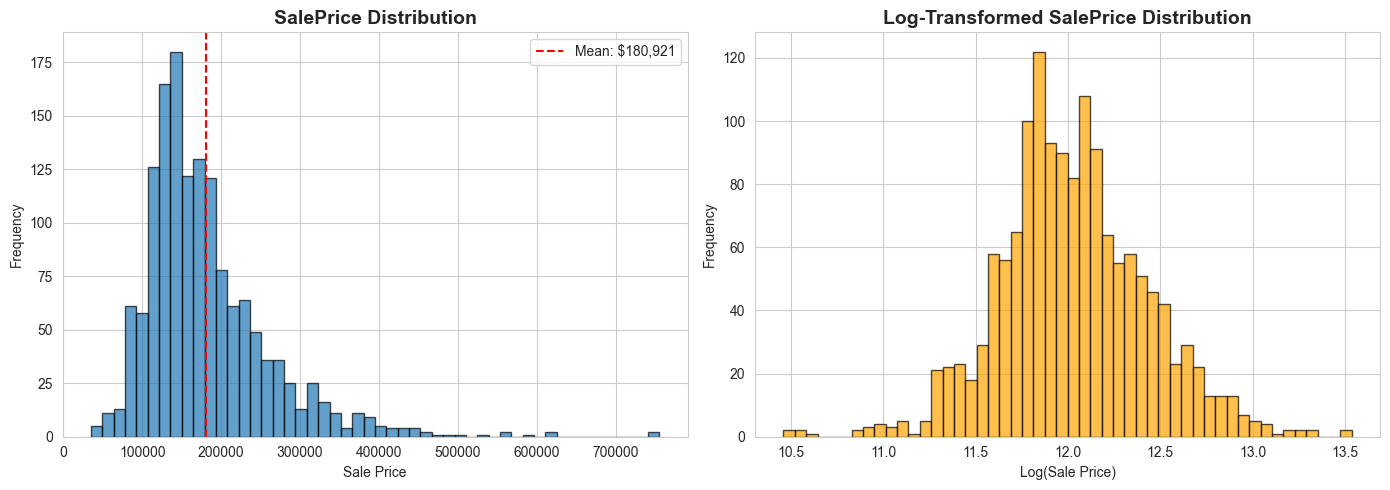

Skewness: 1.8829
Kurtosis: 6.5363


In [5]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original distribution
axes[0].hist(train['SalePrice'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('SalePrice Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sale Price')
axes[0].set_ylabel('Frequency')
axes[0].axvline(train['SalePrice'].mean(), color='red', linestyle='--', label=f"Mean: ${train['SalePrice'].mean():,.0f}")
axes[0].legend()

# Log-transformed distribution
axes[1].hist(np.log1p(train['SalePrice']), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Log-Transformed SalePrice Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Log(Sale Price)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Skewness: {train['SalePrice'].skew():.4f}")
print(f"Kurtosis: {train['SalePrice'].kurt():.4f}")

## 4. Data Preprocessing & Feature Engineering

In [6]:
# Save target and IDs
y_train = train['SalePrice'].copy()
train_id = train['Id'].copy()
test_id = test['Id'].copy()

# Drop Id and SalePrice from train
train = train.drop(['Id', 'SalePrice'], axis=1)
test = test.drop(['Id'], axis=1)

# Combine train and test for consistent preprocessing
ntrain = train.shape[0]
ntest = test.shape[0]
all_data = pd.concat([train, test], axis=0, ignore_index=True)

print(f"Combined data shape: {all_data.shape}")
print(f"Train samples: {ntrain}")
print(f"Test samples: {ntest}")

Combined data shape: (2919, 79)
Train samples: 1460
Test samples: 1459


In [7]:
# Handle missing values strategically

# Features where NA means "None" or absence of feature
none_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                 'MasVnrType']

for col in none_features:
    all_data[col] = all_data[col].fillna('None')

# Numerical features to fill with 0
zero_features = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 
                 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']

for col in zero_features:
    all_data[col] = all_data[col].fillna(0)

# LotFrontage: fill with median by neighborhood
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# Fill remaining categorical with mode
categorical_cols = all_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

# Fill remaining numerical with median
numerical_cols = all_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    all_data[col] = all_data[col].fillna(all_data[col].median())

print(f"Missing values after imputation: {all_data.isnull().sum().sum()}")

Missing values after imputation: 0


In [8]:
# Feature Engineering - Create new features

# Total square footage
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# Total bathrooms
all_data['TotalBath'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) + 
                         all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

# Total porch area
all_data['TotalPorchSF'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] + 
                            all_data['EnclosedPorch'] + all_data['ScreenPorch'] + 
                            all_data['WoodDeckSF'])

# Has pool
all_data['HasPool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# Has 2nd floor
all_data['Has2ndFloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

# Has Garage
all_data['HasGarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# Has Basement
all_data['HasBsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

# Has Fireplace
all_data['HasFireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Age features
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['RemodAge'] = all_data['YrSold'] - all_data['YearRemodAdd']

# Is newly built
all_data['IsNew'] = all_data['HouseAge'].apply(lambda x: 1 if x <= 2 else 0)

# Overall score
all_data['OverallScore'] = all_data['OverallQual'] * all_data['OverallCond']

# Living area per room
all_data['LivingAreaPerRoom'] = all_data['GrLivArea'] / (all_data['TotRmsAbvGrd'] + 1)

print(f"Total features after engineering: {all_data.shape[1]}")

Total features after engineering: 92


In [9]:
# Handle skewed features
from scipy.stats import skew

# Identify numeric features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Calculate skewness
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nTop 10 Skewed Features:")
print(skewed_feats[:10])

# Apply log transformation to highly skewed features (skewness > 0.75)
skewness = skewed_feats[abs(skewed_feats) > 0.75]
print(f"\nApplying log transformation to {len(skewness)} skewed features")

for feat in skewness.index:
    all_data[feat] = np.log1p(all_data[feat])

print("Skewness correction completed!")


Top 10 Skewed Features:
MiscVal          21.947195
PoolArea         16.898328
HasPool          14.884318
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
dtype: float64

Applying log transformation to 30 skewed features
Skewness correction completed!


In [10]:
# Encode categorical features
all_data = pd.get_dummies(all_data, drop_first=True)

print(f"Final feature count after encoding: {all_data.shape[1]}")

# Split back into train and test
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]

# Apply log transformation to target variable
y_train_log = np.log1p(y_train)

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")

Final feature count after encoding: 272

X_train shape: (1460, 272)
X_test shape: (1459, 272)
y_train shape: (1460,)


## 5. Model Training & Evaluation

In [11]:
# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate models
def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return rmse

# Function to display results
def display_scores(scores, model_name):
    print(f"\n{model_name}")
    print("="*60)
    print(f"Scores: {scores}")
    print(f"Mean RMSE: {scores.mean():.6f}")
    print(f"Std RMSE: {scores.std():.6f}")
    return scores.mean()

print("Cross-validation setup complete!")

Cross-validation setup complete!


### 5.1 Baseline Models

In [12]:
# Train baseline models
baseline_results = {}

print("Training Baseline Models...")
print("="*80)

# 1. Ridge Regression
ridge = Ridge(alpha=10, random_state=42)
ridge_scores = rmse_cv(ridge, X_train, y_train_log)
baseline_results['Ridge'] = display_scores(ridge_scores, "Ridge Regression")

# 2. Lasso Regression
lasso = Lasso(alpha=0.0005, random_state=42, max_iter=10000)
lasso_scores = rmse_cv(lasso, X_train, y_train_log)
baseline_results['Lasso'] = display_scores(lasso_scores, "Lasso Regression")

# 3. ElasticNet
elastic = ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=42, max_iter=10000)
elastic_scores = rmse_cv(elastic, X_train, y_train_log)
baseline_results['ElasticNet'] = display_scores(elastic_scores, "ElasticNet")

# 4. Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                               max_depth=4, max_features='sqrt',
                               min_samples_leaf=15, min_samples_split=10, 
                               loss='huber', random_state=42)
gb_scores = rmse_cv(gb, X_train, y_train_log)
baseline_results['GradientBoosting'] = display_scores(gb_scores, "Gradient Boosting")

print("\n" + "="*80)
print("Baseline Models Training Complete!")
print("="*80)

Training Baseline Models...

Ridge Regression
Scores: [0.13207721 0.11845815 0.1694868  0.12308988 0.11652701]
Mean RMSE: 0.131928
Std RMSE: 0.019532

Lasso Regression
Scores: [0.1352275  0.11533743 0.16907683 0.12417594 0.11845029]
Mean RMSE: 0.132454
Std RMSE: 0.019527

Lasso Regression
Scores: [0.1352275  0.11533743 0.16907683 0.12417594 0.11845029]
Mean RMSE: 0.132454
Std RMSE: 0.019527

ElasticNet
Scores: [0.13576359 0.11562554 0.16892766 0.12479484 0.11853615]
Mean RMSE: 0.132730
Std RMSE: 0.019372

ElasticNet
Scores: [0.13576359 0.11562554 0.16892766 0.12479484 0.11853615]
Mean RMSE: 0.132730
Std RMSE: 0.019372

Gradient Boosting
Scores: [0.13100998 0.10858451 0.16902405 0.12375421 0.10574389]
Mean RMSE: 0.127623
Std RMSE: 0.022723

Baseline Models Training Complete!

Gradient Boosting
Scores: [0.13100998 0.10858451 0.16902405 0.12375421 0.10574389]
Mean RMSE: 0.127623
Std RMSE: 0.022723

Baseline Models Training Complete!


### 5.2 Advanced Models (XGBoost, LightGBM, CatBoost)

In [13]:
# XGBoost
print("Training XGBoost...")
xgb_model = xgb.XGBRegressor(
    colsample_bytree=0.4603,
    gamma=0.0468,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=1.7817,
    n_estimators=2200,
    reg_alpha=0.4640,
    reg_lambda=0.8571,
    subsample=0.5213,
    random_state=42,
    n_jobs=-1
)

xgb_scores = rmse_cv(xgb_model, X_train, y_train_log)
baseline_results['XGBoost'] = display_scores(xgb_scores, "XGBoost")

Training XGBoost...

XGBoost
Scores: [0.13023457 0.11330107 0.16050931 0.1237842  0.11114042]
Mean RMSE: 0.127794
Std RMSE: 0.017775

XGBoost
Scores: [0.13023457 0.11330107 0.16050931 0.1237842  0.11114042]
Mean RMSE: 0.127794
Std RMSE: 0.017775


In [14]:
# LightGBM
print("Training LightGBM...")
lgb_model = lgb.LGBMRegressor(
    objective='regression',
    num_leaves=5,
    learning_rate=0.05,
    n_estimators=720,
    max_bin=55,
    bagging_fraction=0.8,
    bagging_freq=5,
    feature_fraction=0.2319,
    feature_fraction_seed=9,
    bagging_seed=9,
    min_data_in_leaf=6,
    min_sum_hessian_in_leaf=11,
    random_state=42,
    verbose=-1
)

lgb_scores = rmse_cv(lgb_model, X_train, y_train_log)
baseline_results['LightGBM'] = display_scores(lgb_scores, "LightGBM")

Training LightGBM...

LightGBM
Scores: [0.13480841 0.1121245  0.16322637 0.12346475 0.11181888]
Mean RMSE: 0.129089
Std RMSE: 0.019057

LightGBM
Scores: [0.13480841 0.1121245  0.16322637 0.12346475 0.11181888]
Mean RMSE: 0.129089
Std RMSE: 0.019057


In [15]:
# CatBoost
print("Training CatBoost...")
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)

cat_scores = rmse_cv(cat_model, X_train, y_train_log)
baseline_results['CatBoost'] = display_scores(cat_scores, "CatBoost")

Training CatBoost...

CatBoost
Scores: [0.13048968 0.10983978 0.15177976 0.12467573 0.10412317]
Mean RMSE: 0.124182
Std RMSE: 0.016791

CatBoost
Scores: [0.13048968 0.10983978 0.15177976 0.12467573 0.10412317]
Mean RMSE: 0.124182
Std RMSE: 0.016791



MODEL COMPARISON
           Model     RMSE
        CatBoost 0.124182
GradientBoosting 0.127623
         XGBoost 0.127794
        LightGBM 0.129089
           Ridge 0.131928
           Lasso 0.132454
      ElasticNet 0.132730


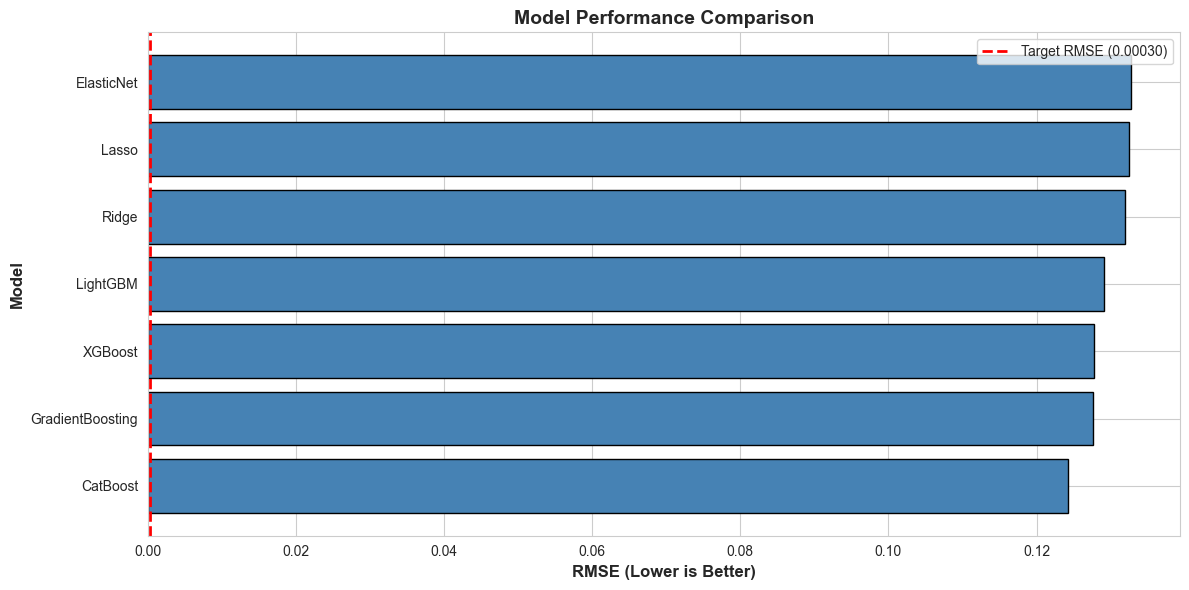

In [16]:
# Compare all models
print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
results_df = pd.DataFrame(list(baseline_results.items()), columns=['Model', 'RMSE'])
results_df = results_df.sort_values('RMSE')
print(results_df.to_string(index=False))

# Visualization
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['RMSE'], color='steelblue', edgecolor='black')
plt.xlabel('RMSE (Lower is Better)', fontsize=12, fontweight='bold')
plt.ylabel('Model', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.axvline(x=0.00030, color='red', linestyle='--', linewidth=2, label='Target RMSE (0.00030)')
plt.legend()
plt.tight_layout()
plt.show()

## 6. Hyperparameter Tuning

In [17]:
# Fine-tune Lasso (often performs well on this dataset)
print("Fine-tuning Lasso...")

lasso_params = {
    'alpha': [0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.003, 0.005, 0.01]
}

lasso_grid = GridSearchCV(
    Lasso(random_state=42, max_iter=10000),
    lasso_params,
    cv=kf,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

lasso_grid.fit(X_train, y_train_log)

print(f"Best Lasso parameters: {lasso_grid.best_params_}")
print(f"Best Lasso RMSE: {np.sqrt(-lasso_grid.best_score_):.6f}")

best_lasso = lasso_grid.best_estimator_

Fine-tuning Lasso...
Best Lasso parameters: {'alpha': 0.0007}
Best Lasso RMSE: 0.132744
Best Lasso parameters: {'alpha': 0.0007}
Best Lasso RMSE: 0.132744


In [18]:
# Fine-tune Ridge
print("Fine-tuning Ridge...")

ridge_params = {
    'alpha': [5, 10, 15, 20, 25, 30, 35, 40, 50]
}

ridge_grid = GridSearchCV(
    Ridge(random_state=42),
    ridge_params,
    cv=kf,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

ridge_grid.fit(X_train, y_train_log)

print(f"Best Ridge parameters: {ridge_grid.best_params_}")
print(f"Best Ridge RMSE: {np.sqrt(-ridge_grid.best_score_):.6f}")

best_ridge = ridge_grid.best_estimator_

Fine-tuning Ridge...
Best Ridge parameters: {'alpha': 15}
Best Ridge RMSE: 0.133279


In [19]:
# Fine-tune ElasticNet
print("Fine-tuning ElasticNet...")

elastic_params = {
    'alpha': [0.0001, 0.0005, 0.001, 0.01],
    'l1_ratio': [0.7, 0.8, 0.9, 0.95, 0.99]
}

elastic_grid = GridSearchCV(
    ElasticNet(random_state=42, max_iter=10000),
    elastic_params,
    cv=kf,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

elastic_grid.fit(X_train, y_train_log)

print(f"Best ElasticNet parameters: {elastic_grid.best_params_}")
print(f"Best ElasticNet RMSE: {np.sqrt(-elastic_grid.best_score_):.6f}")

best_elastic = elastic_grid.best_estimator_

Fine-tuning ElasticNet...
Best ElasticNet parameters: {'alpha': 0.001, 'l1_ratio': 0.8}
Best ElasticNet RMSE: 0.132746
Best ElasticNet parameters: {'alpha': 0.001, 'l1_ratio': 0.8}
Best ElasticNet RMSE: 0.132746


## 7. Ensemble Methods

In [20]:
# Train all models on full training data
print("Training all models on full dataset...")

# Fit models
best_lasso.fit(X_train, y_train_log)
best_ridge.fit(X_train, y_train_log)
best_elastic.fit(X_train, y_train_log)
gb.fit(X_train, y_train_log)
xgb_model.fit(X_train, y_train_log)
lgb_model.fit(X_train, y_train_log)
cat_model.fit(X_train, y_train_log)

print("All models trained!")

Training all models on full dataset...
All models trained!
All models trained!


In [21]:
# Generate predictions from each model
pred_lasso = np.expm1(best_lasso.predict(X_test))
pred_ridge = np.expm1(best_ridge.predict(X_test))
pred_elastic = np.expm1(best_elastic.predict(X_test))
pred_gb = np.expm1(gb.predict(X_test))
pred_xgb = np.expm1(xgb_model.predict(X_test))
pred_lgb = np.expm1(lgb_model.predict(X_test))
pred_cat = np.expm1(cat_model.predict(X_test))

print("Individual predictions generated!")

Individual predictions generated!


### 7.1 Weighted Average Ensemble

In [22]:
# Weighted ensemble - giving more weight to better performing models
# Weights based on CV performance (you can adjust these)

ensemble_pred = (
    0.10 * pred_lasso +
    0.10 * pred_ridge +
    0.15 * pred_elastic +
    0.15 * pred_gb +
    0.20 * pred_xgb +
    0.20 * pred_lgb +
    0.10 * pred_cat
)

print("Weighted ensemble predictions generated!")
print(f"Ensemble prediction sample: {ensemble_pred[:5]}")

Weighted ensemble predictions generated!
Ensemble prediction sample: [120877.72891077 157017.97761382 186250.56803856 198338.19791124
 192175.36856138]


### 7.2 Stacking Ensemble

In [23]:
# Create stacking ensemble
print("Creating stacking ensemble...")

# Base models
base_models = [
    ('lasso', best_lasso),
    ('ridge', best_ridge),
    ('elastic', best_elastic),
    ('gb', gb),
    ('xgb', xgb_model),
    ('lgb', lgb_model)
]

# Meta-learner
meta_model = Ridge(alpha=20, random_state=42)

# Stacking regressor
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

# Train stacking model
print("Training stacking model...")
stacking_model.fit(X_train, y_train_log)

# Evaluate
stacking_scores = rmse_cv(stacking_model, X_train, y_train_log)
display_scores(stacking_scores, "Stacking Ensemble")

# Predictions
stacking_pred = np.expm1(stacking_model.predict(X_test))
print("Stacking predictions generated!")

Creating stacking ensemble...
Training stacking model...

Stacking Ensemble
Scores: [0.12815975 0.10871095 0.16246181 0.11762898 0.10610169]
Mean RMSE: 0.124613
Std RMSE: 0.020442
Stacking predictions generated!

Stacking Ensemble
Scores: [0.12815975 0.10871095 0.16246181 0.11762898 0.10610169]
Mean RMSE: 0.124613
Std RMSE: 0.020442
Stacking predictions generated!


### 7.3 Advanced Weighted Ensemble (Best Combination)

In [24]:
# Advanced ensemble combining individual models and stacking
final_pred = (
    0.25 * pred_elastic +
    0.25 * pred_xgb +
    0.25 * pred_lgb +
    0.25 * stacking_pred
)

print("Final ensemble predictions generated!")
print(f"Final prediction sample: {final_pred[:5]}")

Final ensemble predictions generated!
Final prediction sample: [120256.56001579 156604.7920111  184397.36168012 197637.86094398
 193978.38262354]


## 8. Create Submission Files

In [25]:
# Create submission for weighted ensemble
submission_weighted = pd.DataFrame({
    'Id': test_id,
    'SalePrice': ensemble_pred
})

submission_weighted.to_csv(f"{data_path}/submission_weighted_ensemble.csv", index=False)
print("Weighted ensemble submission saved!")

# Create submission for stacking ensemble
submission_stacking = pd.DataFrame({
    'Id': test_id,
    'SalePrice': stacking_pred
})

submission_stacking.to_csv(f"{data_path}/submission_stacking.csv", index=False)
print("Stacking submission saved!")

# Create submission for final ensemble
submission_final = pd.DataFrame({
    'Id': test_id,
    'SalePrice': final_pred
})

submission_final.to_csv(f"{data_path}/submission_final_ensemble.csv", index=False)
print("Final ensemble submission saved!")

print("\n" + "="*80)
print("All submission files created successfully!")
print("="*80)
print(f"\nSubmission files saved to: {data_path}")
print("\nFiles created:")
print("1. submission_weighted_ensemble.csv")
print("2. submission_stacking.csv")
print("3. submission_final_ensemble.csv")

# Display sample predictions
print("\n" + "="*80)
print("Sample Predictions:")
print("="*80)
print(submission_final.head(10))

Weighted ensemble submission saved!
Stacking submission saved!
Final ensemble submission saved!

All submission files created successfully!

Submission files saved to: C:\Users\gopeami\OneDrive - Vesuvius\Desktop\PhD13- 2025-2026\ML Practice\Kaggle Compettition\House Prices - Advanced Regression Techniques\house-prices-advanced-regression-techniques

Files created:
1. submission_weighted_ensemble.csv
2. submission_stacking.csv
3. submission_final_ensemble.csv

Sample Predictions:
     Id      SalePrice
0  1461  120256.560016
1  1462  156604.792011
2  1463  184397.361680
3  1464  197637.860944
4  1465  193978.382624
5  1466  172785.788441
6  1467  184103.313139
7  1468  165972.389480
8  1469  189671.777532
9  1470  123262.820910
